# Final Assignment Machine Learning

Below 2 cases are shortly presented. 

The first case has a small amount of data and is fairly easy, and the second case is of intermediate level.

For this final assignment you should work out both cases. Every case can be considered as a typical classification problem. The data of both cases is available on the UCI website. Both cases have labels.

For each case the following should be done:
+ Formulate the question are you trying the answer?
+ Clearly describe the problem that you want to solve.
+ What are the features and labels to start with, motivate your choices (e.g. based on literature).
+ Make a description of the dataset.
+ Find out which are the most important features, should you add and remove features?
+ Show how far can you go with K-means clustering?
+ Apply different classification algorithms, vary the values of the most important parameters, play with the number of features and keep records of algo scores. 
+ Motivate your choices, and of course, support your research journey with appealing and informative graphs and diagrams.


## Problem Analysis
There is a problem to classify differet labels of Wine on the basis of selected features.

All the datas are structured into a specifics features and labels.

The features I used are Alcohol,Total phenols,Flavanoids,Colour intensity,OD280/OD31 of diluted wine I divided the data into 3 Lables : Class1(Cultivar 1),Class2(Cultivar 2),Class3(Cultivar 3)


In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
# Loading wine Data
import pandas as pd

df_WineData = pd.read_csv("WineData.csv")
df_WineData.head(5)

,Cultivars,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450



## Description of the dataset.

The Wine dataset has 178 instance of the Wine compositions of wine grown in the same region in Italy.The dataset has 3 classes and 13 different attributes like Alcohol,Malic,Ash,etc.


#### Find out which are the most important features, should you add and remove features?
I have randomly selected the following 5 features and removed the rest features.


In [3]:
# Puting the selected 5  features 
df_Wine_Features=df_WineData[[ 'Alcohol','Total phenols','Flavanoids', 'Color intensity', 'OD280/OD315 of diluted wines']]
# Showing the data of the 5 features
df_Wine_Features.head(5)


,Alcohol,Total phenols,Flavanoids,Color intensity,OD280/OD315 of diluted wines
0,13.20,2.65,2.76,4.38,3.40
1,13.16,2.80,3.24,5.68,3.17
2,14.37,3.85,3.49,7.80,3.45
3,13.24,2.80,2.69,4.32,2.93
4,14.20,3.27,3.39,6.75,2.85


In [4]:
import numpy as np

# loading data on Numpy array, ignoring the names of the features. (pure data)
all_data = np.loadtxt(open("./WineData (1).csv","r"),
    delimiter=",",
    skiprows=0,
    dtype=np.float64
    )

# load class labels from column 1
y_wine = all_data[:,0]

# Converting the labels to integers
y_wine = y_wine.astype(np.int64, copy=False)

# load the 14 features
X_wine = all_data[:,1:]

# printing some general information about the data
print('\ntotal number of samples (rows):', X_wine.shape[0])
print('total number of features (columns):', X_wine.shape[1])

# printing the 1st wine sample
float_formatter = lambda x: '{:.2f}'.format(x)
np.set_printoptions(formatter={'float_kind':float_formatter})
print('\n1st sample (i.e., 1st row):\nClass label: {:d}\n{:}\n'
      .format(int(y_wine[0]), X_wine[0]))


total number of samples (rows): 178
total number of features (columns): 13

1st sample (i.e., 1st row):
Class label: 1
[14.23 1.71 2.43 15.60 127.00 2.80 3.06 0.28 2.29 5.64 1.04 3.92 1065.00]



## Applying Kmeans

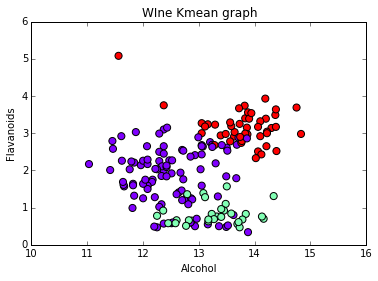

In [5]:
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline


X=df_Wine_Features
est = KMeans(3)  # 3 clusters due to the 3 different classes 
est.fit(X)
y_kmeans = est.predict(X) # predict returns a auto generated labels by kmeans
plt.scatter(X['Alcohol'], X['Flavanoids'], c=y_kmeans, s=50, cmap='rainbow')
plt.xlabel("Alcohol")
plt.ylabel("Flavanoids")

#title
plt.title("WIne Kmean graph")
plt.show()

## Distribution of Alcohol Content

## Splitting into training and test dataset

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
    test_size=0.30, random_state=123)
print(X_train.shape, y_train.shape)

(124, 13) (124,)


In [23]:
print('Class label frequencies')

print('\nTraining Dataset:')
for l in range(1,4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_train).count(l)/y_train.shape[0]))

print('\nTest Dataset:')
for l in range(1,4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_test).count(l)/y_test.shape[0]))

Class label frequencies

Training Dataset:
Class 1 samples: 36.29%
Class 2 samples: 42.74%
Class 3 samples: 20.97%

Test Dataset:
Class 1 samples: 25.93%
Class 2 samples: 33.33%
Class 3 samples: 40.74%


In [58]:
# Applying SVM and SVC

import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl
from sklearn.svm import SVC



clf = SVC(kernel="linear")
clf.fit(X_train, y_train) # creating the model
pred_test=clf.predict(X_test)
pred_train=clf.predict(X_train)

print(pred_test)
print(pred_train)


from sklearn.metrics import accuracy_score
acc=accuracy_score(pred_test,y_test)
print("accuracy  for test set:",acc)

acc=accuracy_score(pred_train,y_train)
print("accuracy  train set:",acc)

from sklearn.metrics import confusion_matrix
confusion_test=confusion_matrix(pred_test,y_test)
print("confusion matrix  for test set:",confusion_test)

confusion_train=confusion_matrix(pred_train,y_train)
print("confusion matrix  for train set:",confusion_train)

[3 2 3 2 2 3 1 3 3 2 3 3 3 1 1 3 2 2 1 2 3 3 3 3 2 3 3 2 1 1 1 1 2 2 3 2 3
 1 2 2 3 3 1 1 2 1 1 2 1 2 2 3 3 2]
[1 2 2 2 1 1 1 1 2 1 1 1 3 1 2 1 2 3 1 1 1 3 2 2 2 3 1 1 2 2 2 3 3 1 3 3 3
 3 2 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 3 1 3 1 1 3 2 3 1 1 2 1 3 2 2 1 1 2 1 2
 3 2 1 1 1 2 2 2 3 3 2 1 2 2 2 2 2 2 2 2 3 3 3 3 1 2 1 1 1 2 3 2 3 3 2 1 2
 1 3 2 2 1 2 2 2 1 2 2 2 2]
accuracy  for test set: 0.981481481481
accuracy  train set: 1.0
confusion matrix  for test set: [[14  0  0]
 [ 0 18  1]
 [ 0  0 21]]
confusion matrix  for train set: [[45  0  0]
 [ 0 53  0]
 [ 0  0 26]]


In [59]:
# Applying Naive Bayes
from sklearn.naive_bayes import GaussianNB
import numpy as np

clf = GaussianNB()
clf.fit(X_train, y_train)
GaussianNB()
pred_test=clf.predict(X_test)
pred_train=clf.predict(X_train)

print(pred_test)
print(pred_train)


from sklearn.metrics import accuracy_score
acc=accuracy_score(pred_test,y_test)
print("accuracy  for test set :",acc)
 
acc=accuracy_score(pred_train,y_train)
print("accuracy for train set :",acc)
 
from sklearn.metrics import confusion_matrix
confusion_test=confusion_matrix(pred_test,y_test)
print("confusion matrix  for test set:",confusion_test)

confusion_train=confusion_matrix(pred_train,y_train)
print("confusion matrix  for train set:",confusion_train)

[3 2 3 2 2 3 1 3 3 2 3 3 3 1 1 3 2 2 1 2 3 3 3 3 2 3 3 2 1 1 1 1 3 2 3 2 3
 1 2 2 3 3 1 1 2 1 1 2 1 2 2 3 3 2]
[1 2 2 2 1 1 1 1 2 1 1 1 3 1 2 1 2 3 1 1 1 3 2 2 2 3 1 1 2 2 2 3 3 1 3 3 3
 3 2 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 3 1 3 1 2 3 2 3 1 1 2 1 3 2 2 1 1 2 1 2
 3 2 1 1 1 2 2 2 3 3 2 1 2 2 2 2 2 2 2 2 3 3 3 3 1 2 1 1 1 2 3 2 3 3 2 1 2
 1 3 2 2 1 2 2 3 1 2 2 2 2]
accuracy  for test set : 1.0
accuracy for train set : 0.983870967742
confusion matrix  for test set: [[14  0  0]
 [ 0 18  0]
 [ 0  0 22]]
confusion matrix  for train set: [[44  0  0]
 [ 1 52  0]
 [ 0  1 26]]


#### Normalize

In [24]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

In [25]:
from sklearn.preprocessing import StandardScaler

# Standarize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:5,:]

array([[0.96, -0.45, 0.33, -1.62, 0.80, 2.40, 1.70, -0.21, 0.42, 0.92,
        0.19, 0.85, 1.32],
       [0.78, -0.90, -1.52, -0.34, -0.39, -0.36, -0.37, -0.21, -1.67,
        -0.53, 1.17, -0.29, -0.39],
       [-1.20, -0.07, -0.60, 0.63, -1.02, 0.41, 0.54, 0.20, -0.54, -0.99,
        -0.48, 0.88, -1.15],
       [-0.83, -1.01, -0.63, -0.02, -0.88, 1.81, 1.02, -1.29, 0.42, -0.24,
        1.12, 0.30, -1.03],
       [1.26, -0.08, 1.03, -0.47, 1.50, 0.41, 0.40, -0.30, -0.72, 0.03,
        0.41, 1.31, 1.64]])

In [26]:
# Applying SGD classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
# Creating the model
clf.fit(X_train, y_train)

# Print the 'learned' coeficients
print(clf.coef_)
print(clf.intercept_)

[[32.77 3.89 21.30 -35.52 7.10 0.24 22.70 2.71 -20.02 7.09 6.82 36.23 33.41]
 [-36.29 -0.46 -40.79 13.91 -11.53 14.34 -10.76 5.28 4.29 -65.98 32.33 6.06
  -57.23]
 [6.22 7.56 10.64 11.05 -7.12 -15.70 -27.87 -13.18 -16.55 31.78 -23.79
  -20.22 13.75]]
[-40.02 -36.53 -95.91]


#### Prediction accuracy Score

In [27]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.981481481481


In [30]:
import seaborn as sns
%matplotlib inline


In [32]:
import pandas as pd

df_WineData1 = pd.read_csv("WineData (1).csv")
df_WineData1.columns = [
    'Cultivars', 'Alcohol', 'Malic Acid','Ash', ' Alcalinity of ash','Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'
]
df_WineData1.head(8)

,Cultivars,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045


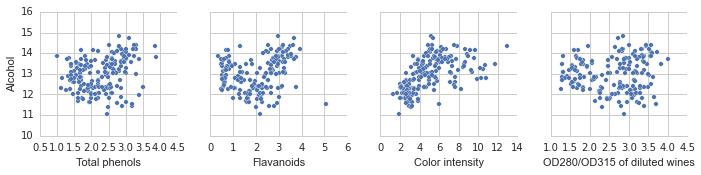

In [51]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_WineData1, x_vars=['Total phenols', 'Flavanoids','Color intensity','OD280/OD315 of diluted wines'], y_vars=['Alcohol'], size=2.5);
plt.show()

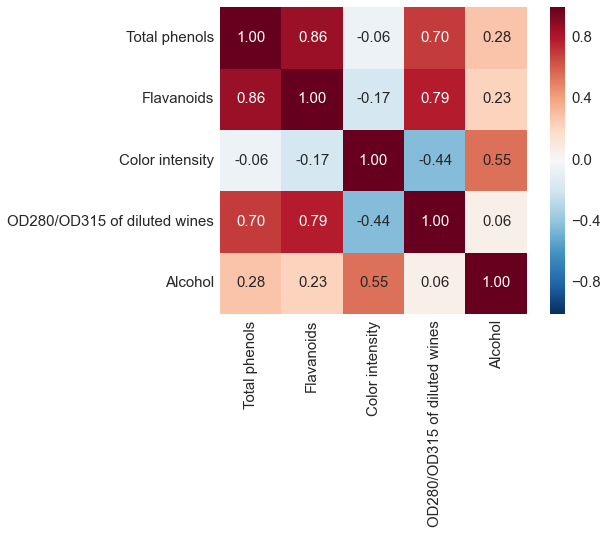

In [36]:
cols = ['Total phenols', 'Flavanoids','Color intensity','OD280/OD315 of diluted wines', 'Alcohol']
cm = np.corrcoef(df_WineData1[cols].values, rowvar=0)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cols,
    xticklabels=cols)
plt.show()

#### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

X = df_WineData1[['Alcohol']].values
y = df_WineData1['OD280/OD315 of diluted wines'].values

slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 0.050
Intercept: 1.954


In [43]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return None

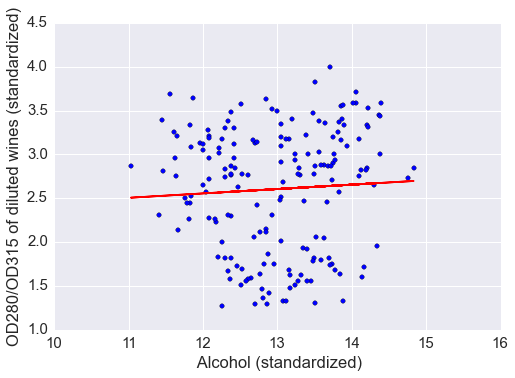

In [44]:
lin_regplot(X, y, slr)
plt.xlabel(' Alcohol (standardized)')
plt.ylabel('OD280/OD315 of diluted wines (standardized)')
plt.show()

####  RANdom SAmple Consensus (RANSAC)

In [45]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
ransac = RANSACRegressor(LinearRegression(),
    max_trials=100,
    min_samples=50,
    residual_metric=lambda x: np.sum(np.abs(x), axis=1), 
    residual_threshold=5.0, 
    random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, max_trials=100,
        min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x000000000A5E1268>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

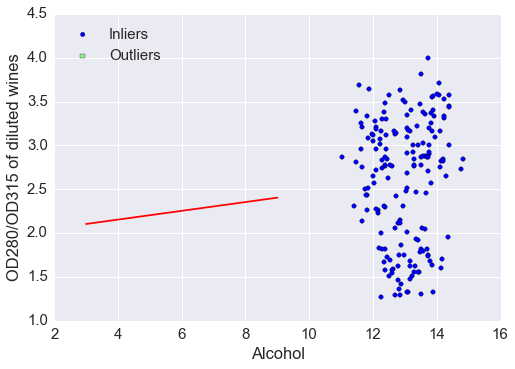

In [46]:
inlier_mask = ransac.inlier_mask_
# outliers = !inliers
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
    c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
    c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Alcohol')
plt.ylabel('OD280/OD315 of diluted wines')
plt.legend(loc='upper left')
plt.show()

In [47]:
from sklearn.cross_validation import train_test_split
X = df_WineData1.iloc[:, :-1].values
y = df_WineData1['Alcohol'].values
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0
)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

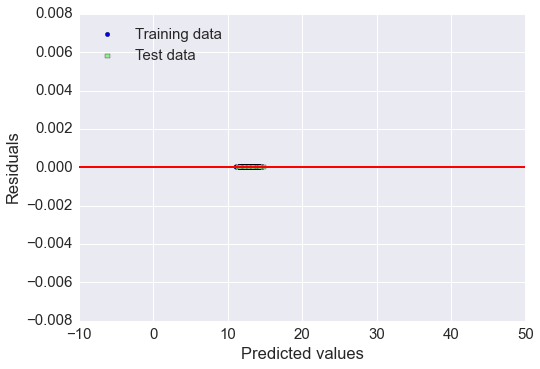

In [48]:
plt.scatter(y_train_pred, y_train_pred - y_train,
    c='blue', marker='o', label='Training data'
)
plt.scatter(y_test_pred,  y_test_pred - y_test,
    c='lightgreen', marker='s', label='Test data'
)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

MSE train: 0.000, test: 0.000


In [50]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % 
    (r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

R^2 train: 1.000, test: 1.000
